## 1.

Dada la función $f(x) = -4x^6 + 5x^2 - x + 1$:

1. Calcule el área bajo la curva usando el método de Monte Carlo generando 1000 y 1000000 puntos $(x,y)$ aleatorios. Para ello use sus propios generadores congruenciales de numeros pseudoaleatorios uniformes $U(0,1)$, tal que genere puntos $(x,y)$ para el rango $x = [-1,1]$ y $y =[0,max(f(x))]$.
2. Grafique la función y los puntos $(x,y)$ aleatorios generados.
3. Calcule el error en comparación con el valor de la solución analítica.

In [1]:
# Calcular el área bajo la curva de la función usando el método de Monte Carlo
%matplotlib inline 

import math
import random
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return -4*math.pow(x,6)+5*math.pow(x,2)- x + 1#math.sqrt(1.0 - x * x)

xmin = -1.0
xmax = 1.0

# Encontrar el ymax
numPasos = 100000 
ymin = 0#f(xmin)
ymax = ymin
for i in range(numPasos):
    x = xmin + (xmax - xmin) * float(i) / numPasos
    y = f(x)
    if y < ymin: ymin = y
    if y > ymax: ymax = y

# Monte Carlo
rectArea = (xmax - xmin) * (ymax - ymin)
numPuntos = 1000000
ct = 0

Xr=[]
Yr=[]
Xb=[]
Yb=[]

for j in range(numPuntos):
    x = xmin + (xmax - xmin) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    ##if f(x) > 0 and y > 0 and y <= f(x):
    if x>=-1 and x<=1 and y <= f(x):
        ct += 1
        Xr.append(x)
        Yr.append(y)
    else:
        Xb.append(x)
        Yb.append(y)

MCArea = rectArea * float(ct) / numPuntos
print("Area bajo la curva = " + str(MCArea))

Area bajo la curva = 4.188746541011529


### Solución analítica

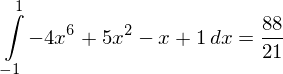

In [2]:
from sympy import *
from sympy import init_printing
init_printing() 

x = Symbol('x')

aa=Integral((-4*x**6+5*x**2 - x + 1), (x, -1, 1))

Eq(aa, aa.doit())

In [3]:
Err = 88/21 - MCArea
print("Area estimada usando MC: ", MCArea)
print("Area calculada a partir de la integral: ", 88/21)
print("Error: ",Err)

Area estimada usando MC:  4.188746541011529
Area calculada a partir de la integral:  4.190476190476191
Error:  0.0017296494646616978


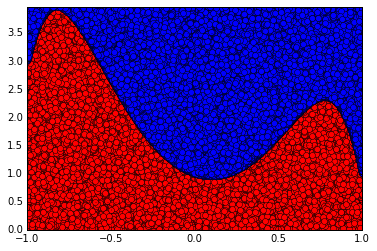

In [4]:
# Graficar
xx = np.arange(xmin,xmax,(xmax-xmin)/1000)
yy=[]

for xi in xx:
    yy.append(f(xi))
plt.plot(xx,yy,color="black")
plt.plot(Xr, Yr, color="red",linewidth=0, marker='o', lw=1 )
plt.plot(Xb, Yb, color="blue",linewidth=0, marker='o', lw=1 )

plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
plt.grid(True) 
plt.show()

## 2. 

Dados los siguientes valores de la distribución de probabilidad discreta de la variable aleatoria X de un dado de 8 lados: X = {1,2,3,4,5,6,7,8}, p(X) = {0.11,0.3,0.12,0.2,0.05,0.07,0.05,0.10}, ¿Qué valores retornaría el generador de variables aleatorias por el método de la inversión si los números aleatorios generados son: U = {0.1573, 0.9454, 0.8211, 0.6996, 0.0318, 0.1708, 0.6865, 0.9102, 0.2579, 0.6344}?

    A. [8, 2, 5, 2, 4, 3, 2, 4, 2, 4]
    B. [2, 8, 6, 4, 1, 2, 4, 8, 2, 4]
    C. [6, 3, 8, 2, 2, 7, 2, 7, 3, 8]
    D. [4, 5, 5, 6, 2, 4, 2, 4, 2, 4]
    E. [2, 4, 2, 7, 3, 1, 4, 4, 1, 7]
    
_Rta:_

    B. [2, 8, 6, 4, 1, 2, 4, 8, 2, 4]

In [5]:
def genvardiscret(U,X,P):
    V = []
    for t in range(0, len(U)):
        for t2 in range(0, len(X)):
            if U[t]<=P[t2]:
                V.append(X[t2])
                break
    return V

X=[1,2,3,4,5,6,7,8]
p=[0.11,0.3,0.12,0.2,0.05,0.07, 0.05, 0.10]
X=np.array(X)
p=np.array(p)
P=p.cumsum()

U=[0.1573, 0.9454, 0.8211, 0.6996, 0.0318, 0.1708, 0.6865, 0.9102, 0.2579, 0.6344]
V=genvardiscret(U,X,P)
print(V)

[2, 8, 6, 4, 1, 2, 4, 8, 2, 4]


## 3.

Se tiene un sistema de línea de espera con un servidor y capacidad infinita (Modelo de Colas G/G/1) (Ver [Presentación](https://docs.google.com/a/unillanos.edu.co/presentation/d/19dSItA2blI4TOf8IExeJWjmF_2VWCRa7hqKkEdYuJfY/edit?usp=sharing) ), en el cual tanto los tiempos de llegada entre clientes, así como los tiempos de atención del servidor se comportan como  variables aleatorias generadas de distribuciones de probabilidad exponenciales, en donde en promedio llegan A clientes por minuto al sistema y el servidor atiende en promedio B clientes por minuto. La simulación inicia en el tiempo $t=0$ y se deja de permitir el ingreso de mas clientes en el sistema en el tiempo $T=100$.

Para analizar el sistema Ud. debe usar la implementación de acuerdo con el Modelo de Colas G/G/1 visto en clase (diapositivas 42 y 43 [Presentación](https://docs.google.com/a/unillanos.edu.co/presentation/d/19dSItA2blI4TOf8IExeJWjmF_2VWCRa7hqKkEdYuJfY/edit?usp=sharing) )). 

Para la generación de las variables aleatorias con distribución exponencial debe usar el método de la inversión para variables aleatorias continuas usando generadores congruenciales mixtos. _Ayuda: El método de inversión para variables aleatorias continuas debe usar la función inversa $F^{-1}(p)$ de la distribución de probabilidad acumulada de la distribución exponencial en donde el valor $p$ proviene del generador congruencial mixto_.

Para la generación de las variables aleatorias de los tiempos entre las llegadas de clientes (variable aleatoria $X$) debe generar variables aleatorias continuas de una distribución exponencial con $\lambda = A$ a partir de un generador congruencial Borland C/C++ (i.e. $a = 22695477$, $c = 1$, $m=2^{32}$) y semilla $X_0 = 987654321$.

Para la generación de las variables aleatorias de los tiempos de atención del servidor (variable aleatoria $Y$) debe generar variables aleatorias continuas de una distribución exponencial con $\lambda = B$ a partir de un generador congruencial RANDU (i.e. $a = 65539$, $c = 0$, $m=2^{31}$) y semilla $X_0 = 123456789$.

Con su implementación para el análisis del sistema por favor responda lo siguiente:

1. Tiempo promedio de los clientes en el sistema.
2. Tiempo promedio de los clientes en la cola.
3. Tiempo transcurrido desde $T$ hasta que el último cliente abandona el sistema.
4. Número máximo de clientes en el sistema durante la simulación.

    Tiempo medio de los clientes en el sistema:  3.956550916349596
    Tiempo medio de los clientes en la cola:  3.613049292857229
    Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  11.82996566997869
    Número máximo de clientes en el sistema:  36

In [7]:
%matplotlib inline 

import numpy as np
import math
import matplotlib.pyplot as plt

Xant1 = 987654321
Xant2 = 123456789

M = 99999.0
T = 100.0
at = []
an = []
LLt = []
St = []

def gencongru1(): #
    global Xant1
    a = 22695477
    c = 1
    m = 2**32
    Xnext = (a * Xant1 + c) % m
    Xant1 = Xnext
    U = Xnext / m
    return U

def gencongru2():
    global Xant2
    a = 65539
    c = 0
    m = 2**31
    Xnext = (a * Xant2 + c) % m
    Xant2 = Xnext
    U = Xnext / m
    return U

def GenerarX():
    vlambda = 3
    U = gencongru1()
    X = -(math.log(1-U))/float(vlambda)
    return X

def GenerarY():
    vlambda = 3
    U = gencongru2()
    Y = -(math.log(1-U))/float(vlambda)
    return Y

def Llegada(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t=tsuc
    n = n + 1
    LLt.append(t)
    at.append(t)
    an.append(n)
    
    NLL = NLL + 1
    LL.append(t)
    
    X = GenerarX()
    
    if (t+X) < T:
        TSuc['tLL'] = t + X
    if n==1:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        #Serv[NS]=Y 
        Serv.append(Y)
        
def Servidor(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n - 1
    
    St.append(t)
    at.append(t)
    an.append(n)
    
    NS = NS + 1
    S.append(t)

    if n>0:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        Serv.append(Y) 
    
t = tsuc = NLL = NS = n = 0

at.append(t)
an.append(n)

TSuc = {"tLL":M, "tS":M}

LL = []
S = []
Serv = []
LL.append(0.0)
S.append(0.0)
Serv.append(0.0)

X = GenerarX()

if X > T:
    Tp = t_med_sistema = t_med_cola = 0.0
    exit
else:
    Llegada(X)
    while((TSuc['tLL'] != M)|(TSuc['tS']!=M)):
        if TSuc['tLL'] < TSuc['tS']:
            tsuc = TSuc['tLL']
            TSuc['tLL'] = M
            Llegada(tsuc)
            
        if TSuc['tS'] < TSuc['tLL']:
            tsuc = TSuc['tS']
            TSuc['tS'] = M
            Servidor(tsuc)

    Tp = max(0,t-T)
    acumulo1 = acumulo2 = 0.0
    ind = 0
    
    while ind < NLL:
        acumulo1 = acumulo1 + S[ind] - LL[ind]
        acumulo2 = acumulo2 + S[ind] - LL[ind] - Serv[ind]
        ind = ind + 1
    t_med_sistema = acumulo1/NLL
    t_med_cola = acumulo2/NLL

    exit

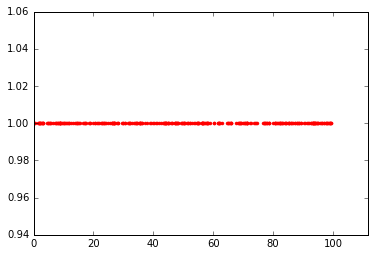

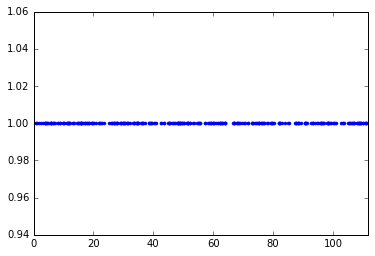

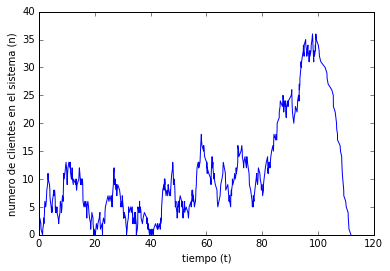

Tiempo medio de los clientes en el sistema:  3.956550916349596
Tiempo medio de los clientes en la cola:  3.613049292857229
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  11.82996566997869
Número máximo de clientes en el sistema:  36
Total de clientes que pasaron por el sistema:  318


In [9]:
at = np.array(at)
an = np.array(an)

LLt = np.array(LLt)
St = np.array(St)

tmp = np.zeros((len(LLt)))+1

plt.plot(LLt, tmp, 'r.')
plt.xlim(0, max(at))
plt.show()

tmp = np.zeros((len(St)))+1

plt.plot(St, tmp, 'b.')
plt.xlim(0, max(at))
plt.show()

plt.plot(at,an)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el sistema (n)')
plt.show()

print("Tiempo medio de los clientes en el sistema: ",t_med_sistema)
print("Tiempo medio de los clientes en la cola: ",t_med_cola)
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ",Tp)
print("Número máximo de clientes en el sistema: ",max(an))
print("Total de clientes que pasaron por el sistema: ",NLL)

## 4. 

**Una secuencia de valores pseudoaletorios debe asegurar: 1. Uniformidad 2. Complejidad 3. Aleatoriedad 4. Circularidad**

    A. Si las opciones 1 y 2 son correctas
    B. Si las opciones 2 y 3 son correctas
    C. Si las opciones 3 y 4 son correctas
    D. Si las opciones 2 y 4 son correctas
    E. Si las opciones 1 y 3 son correctas

_Rta:_

    E. Si las opciones 1 y 3 son correctas

## 5. 

**Es el tiempo de usuario en la cola más el tiempo de servicio**

    A. ¿Qué es el tiempo en cola?
    B. ¿Qué es el tiempo de ejecución?
    C. ¿Qué es el tiempo en servicio?
    D. ¿Qué es el tiempo en el sistema?
    E. ¿Qué es el tiempo de ocio?

_Rta:_

    D. ¿Qué es el tiempo en el sistema?